##**RNN based Binary Classification of Anomilies in IOT data**



In [ ]:
# Importing desired libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#loading dataset
data = pd.read_csv('/content/gdrive/My Drive/IoTID20.csv')

In [ ]:
# displaying some initial data
data.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
#calculating sum
data.isnull().sum().sum()

0

In [ ]:
# dropping unnecessary columns
data = data.drop(columns = ['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol','Timestamp', 'Cat', 'Sub_Cat','Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min'])

In [ ]:
# replacing with numeric values
data.Label.replace(['Anomaly', 'Normal'], [1, 0], inplace = True)

In [ ]:
# normalizing data
normalized_df = (data-data.min())/(data.max()-data.min())

In [ ]:
normalized_df = normalized_df.dropna()

In [ ]:
features = normalized_df.drop(columns=['Label']).to_numpy()
labels = normalized_df[['Label']].to_numpy()

In [ ]:
# checking shape of features
features.shape, labels.shape

((625415, 66), (625415, 1))

In [ ]:
# splitting training and test sets
x_train = features[:575783]
y_train = labels[:575783]

x_test = features[575783:]
y_test = labels[575783:]

In [ ]:
# checking shape of features
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((575783, 66), (49632, 66), (575783, 1), (49632, 1))

In [ ]:
# reshaping data
x_train1 = x_train.reshape((575783, 1 , 66))
x_test1 = x_test.reshape((49632,1,66))
x_test1.shape , x_train1.shape

((49632, 1, 66), (575783, 1, 66))

In [ ]:
# creating neural network model
modelbinary = keras.Sequential([
              keras.layers.SimpleRNN(128, input_shape=(1,66), return_sequences=True),
              keras.layers.SimpleRNN(30,return_sequences=True),
              keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# compiling model
modelbinary.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training model
history = modelbinary.fit(x_train1, y_train, epochs = 5)

Epoch 1/5
17994/17994 [==============================] - 100s 5ms/step - loss: 0.1080 - accuracy: 0.9648
Epoch 2/5
17994/17994 [==============================] - 96s 5ms/step - loss: 0.0663 - accuracy: 0.9788
Epoch 3/5
17994/17994 [==============================] - 95s 5ms/step - loss: 0.0525 - accuracy: 0.9830
Epoch 4/5
17994/17994 [==============================] - 96s 5ms/step - loss: 0.0496 - accuracy: 0.9841
Epoch 5/5
17994/17994 [==============================] - 95s 5ms/step - loss: 0.0481 - accuracy: 0.9847


In [ ]:
# evaluating model
loss,accuracy = modelbinary.evaluate(x_test1,y_test)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

1551/1551 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9839
Loss:  0.04734240099787712
Accuracy:  98.39417934417725 %


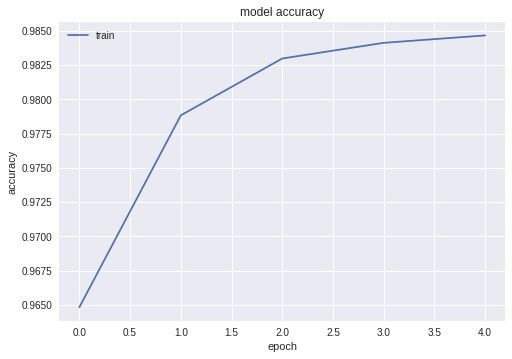

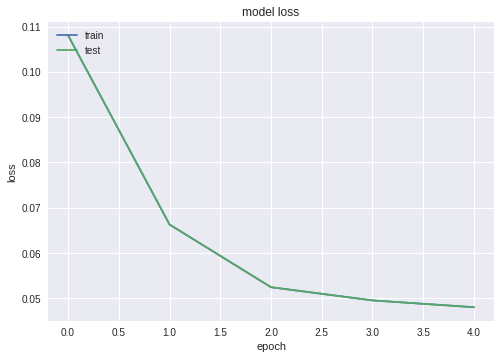

In [ ]:
# plotting results
plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')

##**RNN based MultiClass Classification of Anomilies in IOT data**

In [ ]:
# preprocessing data
data2 = pd.read_csv('/content/gdrive/My Drive/IoTID20.csv')
data2 = data2.drop(columns = ['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol','Timestamp','Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min'])
data2.Label.replace(['Anomaly', 'Normal'], [1, 0], inplace = True)
data2.Cat.replace(['Mirai', 'DoS','Scan','Normal','MITM ARP Spoofing'], [1,2,3,4,5], inplace = True)
data2.Sub_Cat.replace(['Mirai-Ackflooding', 'DoS-Synflooding','Scan Port OS','Mirai-Hostbruteforceg','Mirai-UDP Flooding', 'Mirai-HTTP Flooding','Normal', 'Scan Hostport', 'MITM ARP Spoofing'], [1,2,3,4,5,6,7,8,9], inplace = True)


In [ ]:
# data normalization
normalized_df2 = (data2-data2.min())/(data2.max()-data2.min())

In [ ]:
normalized_df2 = normalized_df2.dropna()

In [ ]:
features2 = normalized_df2.drop(columns=['Label','Cat','Sub_Cat']).to_numpy()
labels2 = normalized_df2[['Label','Cat','Sub_Cat']].to_numpy()

In [ ]:
# splitting training and testing data
x_train2 = features2[:575783]
y_train2 = labels2[:575783]

x_test2 = features2[575783:]
y_test2 = labels2[575783:]

In [ ]:
x_train2.shape , x_test2.shape , y_train2.shape , y_test2.shape

((575783, 66), (49632, 66), (575783, 3), (49632, 3))

In [ ]:
x_train21 = x_train2.reshape((575783, 1 , 66))
x_test21 = x_test2.reshape((49632,1,66))
y_train21 =  y_train2.reshape(575783,1,3)
y_test21 =  y_test2.reshape(49632,1,3)
x_test21.shape , x_train21.shape

((49632, 1, 66), (575783, 1, 66))

In [ ]:
# creating RNN model
model2 = keras.Sequential([
              keras.layers.SimpleRNN(128, input_shape=(1,66), return_sequences=True),
              keras.layers.SimpleRNN(30,return_sequences=True),
              keras.layers.Dense(3,activation='softmax')
])

In [ ]:
# displaying model structure
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 128)            24960     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 30)             4770      
                                                                 
 dense_1 (Dense)             (None, 1, 3)              93        
                                                                 
Total params: 29,823
Trainable params: 29,823
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training model
history = model2.fit(x_train21,y_train21, epochs = 5)

Epoch 1/5
17994/17994 [==============================] - 93s 5ms/step - loss: 2.6915 - accuracy: 0.9358
Epoch 2/5
17994/17994 [==============================] - 93s 5ms/step - loss: 3.8941 - accuracy: 0.9360
Epoch 3/5
17994/17994 [==============================] - 92s 5ms/step - loss: 5.1528 - accuracy: 0.9360
Epoch 4/5
17994/17994 [==============================] - 92s 5ms/step - loss: 6.4381 - accuracy: 0.9360
Epoch 5/5
17994/17994 [==============================] - 95s 5ms/step - loss: 7.7871 - accuracy: 0.9360


In [ ]:
# evaluating model
loss,accuracy = model2.evaluate(x_test21,y_test21)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

1551/1551 [==============================] - 4s 2ms/step - loss: 8.4961 - accuracy: 0.9354
Loss:  8.496100425720215
Accuracy:  93.5384452342987 %


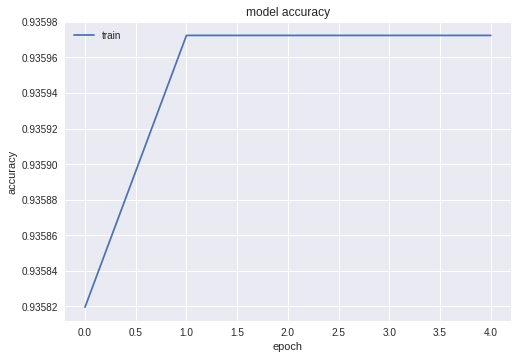

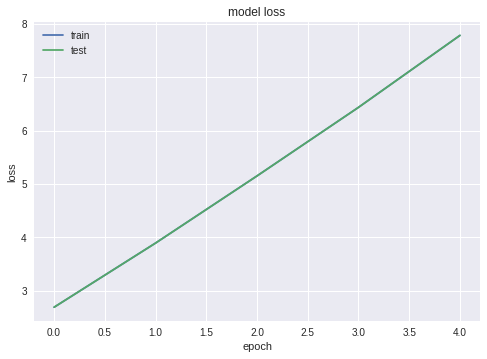

In [ ]:
# plotting results
plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')

## **Result:**
Using Simple RNN model for binary classification achieved an accuracy of: <br>
training :98.48%<br>
testing: 98.22%<br>

For multiclass classification:<br>
training: 93.60%<br>
testing: 93.53%<br>